# 14. Optimization
---
**Content:**
- [The Gradient Descent Algorithm](#The-Gradient-Descent-Algorithm)
- [The Conjugate Gradient Algorithm](#The-Conjugate-Gradient-Algorithm)
- [Further methods](#Further-methods)
- [Using bounds instead of $x_0$](#Using-bounds-instead-of-$x_0$)
- [The Full Problem: Including Constraints](#The-Full-Problem:-Including-Constraints)
- [The Full Mutli-Dimensional Problem](#The-Full-Mutli-Dimensional-Problem)
- [Fitting via Optimization](#Fitting-via-Optimization)
- [Finding an Optimal Trajectory: The Sliding Particle](#Finding-an-Optimal-Trajectory:-The-Sliding-Particle)

See also: https://scipy-lectures.org/advanced/mathematical_optimization/index.html

## The Problem
---
$$
\begin{align*}
    \underset{x}{\text{minimize}} f(x)
    \Leftrightarrow
    \text{ find } x_0 \text{ so that } f(x_0) \le f(x)
\end{align*}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# define our function
def f1D(x):
    return x**4.0 - 2.0*x**2.0 + x + 1.0

# and plot it
plt.figure(1)
plt.grid()
x = np.linspace(-2, 2, 100)
plt.plot(x, f1D(x))
plt.show()

## The Gradient Descent Algorithm
---
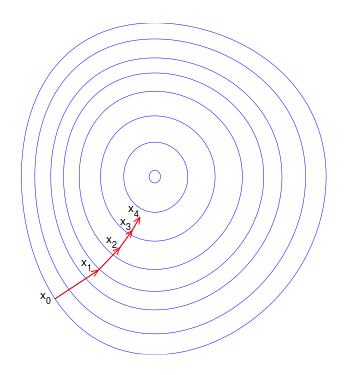

$$
\begin{align*}
    \text{multi-dimensional: } \vec{x}_{n+1} &= \vec{x}_n - \gamma_n \nabla F(\vec{x}_n) \\
    \text{one-dimensional: } x_{n+1} &= x_n - \gamma_n \left.\frac{\partial F(x)}{\partial x}\right|_{x=x_n}
\end{align*}
$$

In [ ]:
# define our function
def f1D(x):
    return x**4.0 - 2.0*x**2.0 + x + 1.0

# and it's derivative
def df1D(x):
    return 4.0*x**3.0 - 4.0*x + 1

# plot the function
plt.figure(1)
plt.grid()
plt.plot(x, f1D(x))

# parameters for the algorithm
x0      =  2
gam     =  0.01
prec    =  0.000001
maxIter =  200

# plot it
plt.plot(x0, f1D(x0), 'o')

# gradient descent iteration
for i in range(0, maxIter):
    
    # next point
    x1 = x0 - gam * df1D(x0)
    
    # plot it
    plt.plot(x1, f1D(x1), 'o')
    
    # check for convergence
    if(abs(x0 - x1) <= prec):
        break
    else:
        x0 = x1
        
print(" Iterations:", i)
print("         x0:", x1)

plt.show()

## The Conjugate Gradient Algorithm
---

<div>
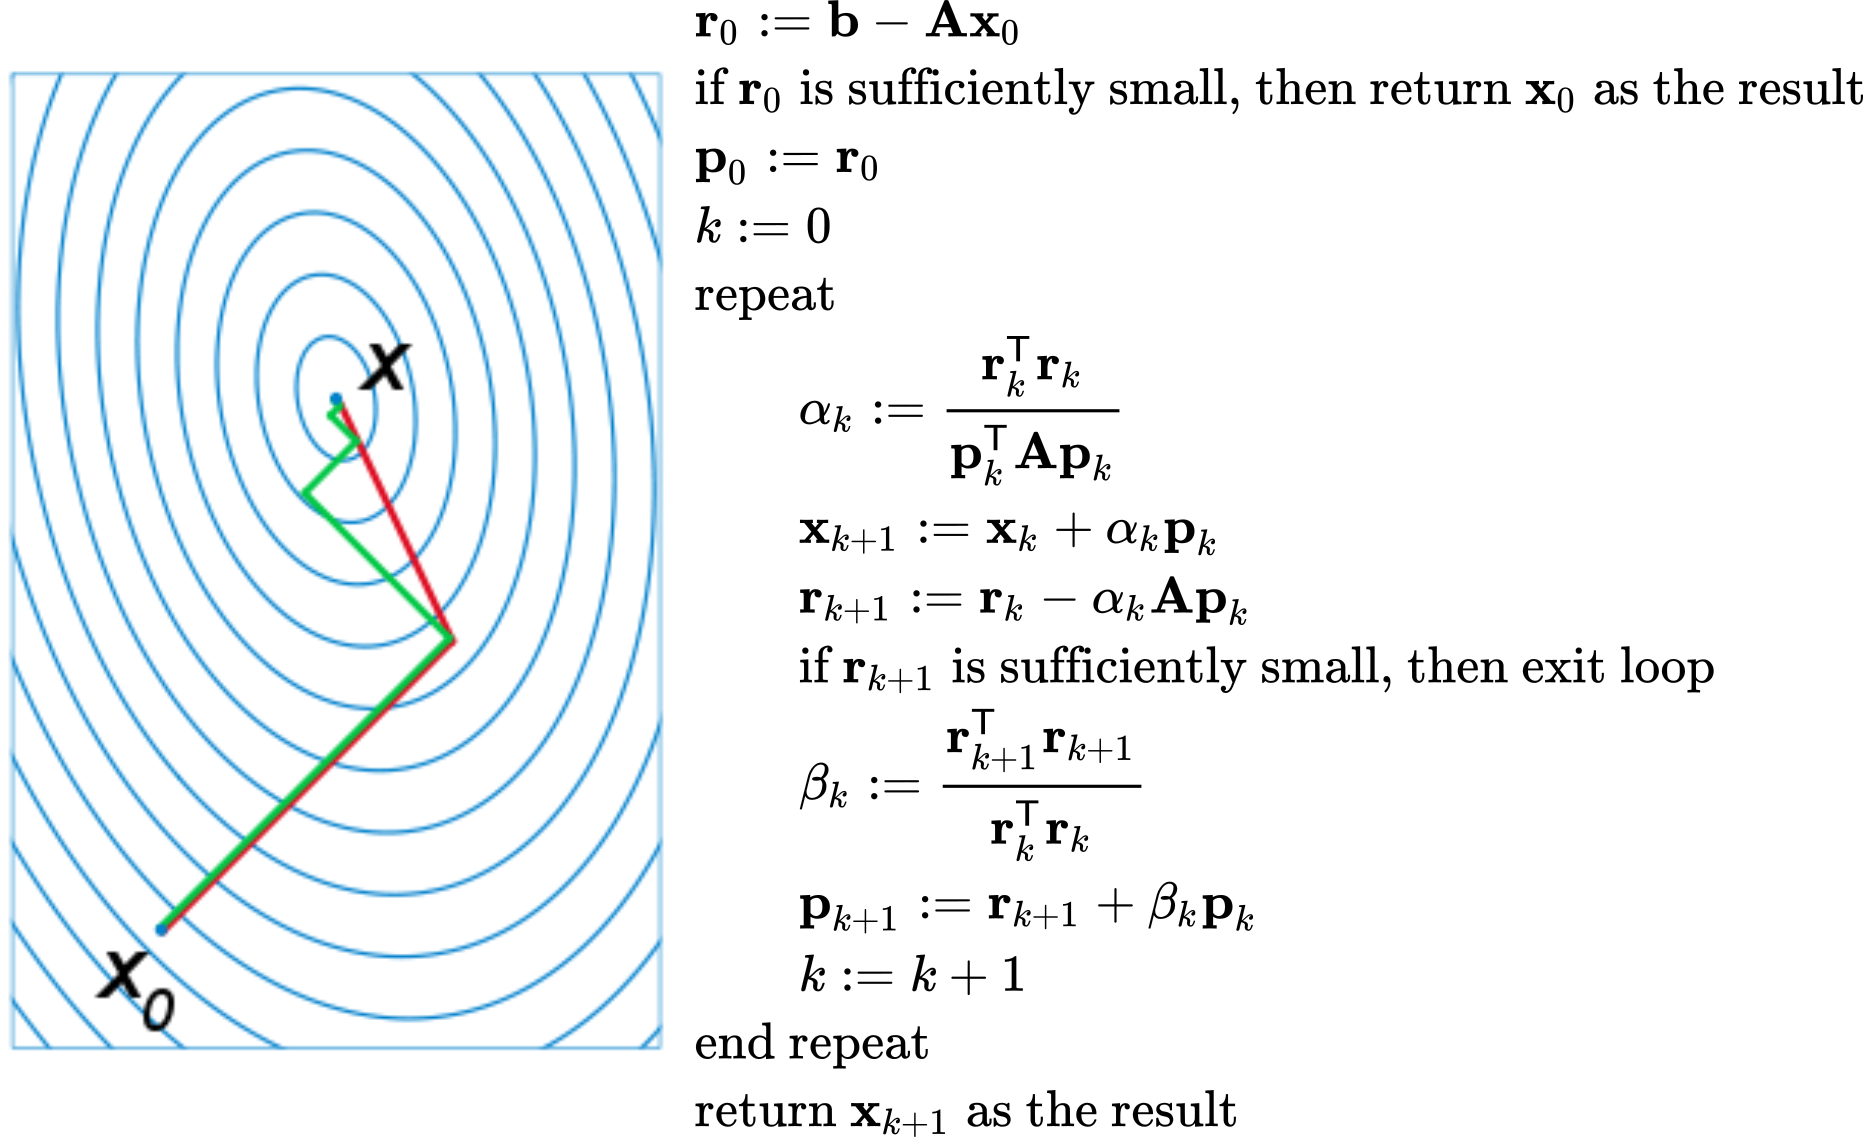
</div>

<font color=green>green: gradient descent</font> | <font color=red>red: conjugate gradient</font>

https://en.wikipedia.org/wiki/Conjugate_gradient_method

### Let's use Scipy for that!

In [ ]:
import scipy.optimize as optimize

In [ ]:
# use Scipy's minimize function
sol = optimize.minimize(fun=f1D, x0=-2, method='CG')

print( sol )

In [ ]:
# and plot it
plt.figure(1)
plt.plot(x, f1D(x))
plt.plot(sol.x, sol.fun, 'o', markersize=10)
plt.show()

In [ ]:
# use Scipy's minimize function
sol = optimize.minimize(fun=f1D, x0=0.5, method='CG')

print( sol )

# and plot it
plt.figure(1)
plt.plot(x, f1D(x))
plt.plot(sol.x, sol.fun, 'o', markersize=10)
plt.show()

## Further methods
---
Scipy allows for the following optimization methods:
- Nelder-Mead, Powell, CG, BFGS, Newton-CG, L-BFGS-B, TNC, COBYLA, SLSQP, trust-constr, dogleg, trust-ncg, trust-exact, trust-krylov

See 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
- https://en.wikipedia.org/wiki/List_of_algorithms#Optimization_algorithms 

for details on all of them.

In [ ]:
# test those which just need x0
algorithms = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 
              'COBYLA', 'SLSQP', 'trust-constr', 'TNC']

plt.figure(1)
plt.plot(x, f1D(x))

for i in range(0, len(algorithms)):
    
    sol = optimize.minimize(fun=f1D, x0=0.5, method=algorithms[i])
    
    plt.plot(sol.x, sol.fun, 'o', markersize=20-i*2, label=algorithms[i])

plt.legend()    
plt.show()

## Using bounds instead of $x_0$
---

In [ ]:
plt.figure(1)
plt.plot(x, f1D(x))

# brent
sol = optimize.minimize_scalar(fun=f1D, method='brent',   bounds=(-2, 2))
plt.plot(sol.x, sol.fun, 'o', markersize=15, label='brent')

# bounded
sol = optimize.minimize_scalar(fun=f1D, method='bounded', bounds=(-2, 2))
plt.plot(sol.x, sol.fun, 's', markersize=10, label='bounded')

# golden
sol = optimize.minimize_scalar(fun=f1D, method='golden',  bounds=(-2, 2))
plt.plot(sol.x, sol.fun, 'd', markersize=10, label='golden')

plt.legend()    
plt.show()

## The Full Problem: Including Constraints
---
$$
\begin{align*}
    &\underset{x}{\text{minimize}} &&f(x) \\
    &\text{subject to } &&g_i(x) \ge 0, i=1,\dots,m \quad \text{inequality contraints}\\
    & &&h_j(x) = 0, j=1,\dots,p \quad \text{equality contraints}
\end{align*}
$$

In [ ]:
# define inqeualtity constraint function g
def g1(x):
    return -x

# define the constraints as a list of dictonaries
cons = [{'type': 'ineq', 
         'fun' : g1}]

sol     = optimize.minimize(fun=f1D, x0=0.5, method='SLSQP')

solCons = optimize.minimize(fun=f1D, x0=0.5, method='SLSQP', constraints=cons)

# and plot it
plt.figure(1)
plt.grid()
plt.plot(x, f1D(x))
plt.plot(sol.x,     sol.fun,     'o', markersize=10, label='without constraint')
plt.plot(solCons.x, solCons.fun, 'o', markersize=10, label='with constraint')
plt.plot(x, g1(x))
plt.legend()
plt.show()

In [ ]:
# define equaltity constraint function h
def h1(x):
    return x

# define the constraints as a list of dictonaries
cons = [{'type': 'eq', 
         'fun' : h1}]

sol     = optimize.minimize(fun=f1D, x0=0.5, method='SLSQP')
solCons = optimize.minimize(fun=f1D, x0=0.5, method='SLSQP', constraints=cons)

print( sol )
print("---------")
print( solCons )

# and plot it
plt.figure(1)
plt.grid()
plt.plot(x, f1D(x))
plt.plot(sol.x,     sol.fun,     'o', markersize=10, label='without constraint')
plt.plot(solCons.x, solCons.fun, 'o', markersize=10, label='with constraint')
plt.plot(x, h1(x))
plt.legend()
plt.show()

## The Full Mutli-Dimensional Problem
---
$$
\begin{align*}
    &\underset{\vec{x}}{\text{minimize}} &&f(\vec{x}) \\
    &\text{subject to } &&g_i(\vec{x}) \ge 0, i=1,\dots,m \quad \text{inequality contraints}\\
    & &&h_j(\vec{x}) = 0, j=1,\dots,p \quad \text{equality contraints}
\end{align*}
$$

> **Note:** See [Matplotlib Plotting](07_Matplotlib_Plotting.ipynb) for 3D data plotting.

### a) 2D example 1

In [ ]:
# 2D function to be minimized
def f2D(x):
    return np.sin(x[0]**2) * np.cos(x[1]-2)

# plot it
x    = np.linspace(0, 4.0, 100)
y    = np.linspace(0, 7.0, 100)
X, Y = np.meshgrid(x, y)
Z    = f2D([X, Y])

plt.figure(1)
plt.contourf(x, y, Z, cmap='RdBu', levels=30)
plt.colorbar()
plt.show()

In [ ]:
# find "the" minimum in the x/y plane
# ... starting from x0 = [2, 3]
sol = optimize.minimize(fun=f2D, x0=[2, 3])

print( sol )

# plot it
plt.figure(1)
plt.contourf(x, y, Z, cmap='RdBu', levels=30)
plt.plot( sol.x[0], sol.x[1], marker='o', markersize=12, color='w' )
plt.colorbar()
plt.show()

In [ ]:
# find "the" minimum in the x/y plane
# ... starting from x0 = [2, 5]
sol = optimize.minimize(fun=f2D, x0=[2, 5])

print( sol )

plt.figure(1)
plt.contourf(x, y, Z, cmap='RdBu', levels=30)
plt.plot( sol.x[0], sol.x[1], marker='o', markersize=12, color='w' )
plt.colorbar()
plt.show()

### b) 2D example 2

In [ ]:
# Be careful, sometimes the computer is not quite right ...
def f2D(x):
    return x[0]+x[1]

sol = optimize.minimize(fun=f2D, x0=[0, 0])

print( sol )  

x    = np.linspace(-4, 4.0, 100)
y    = np.linspace(-4, 4.0, 100)
X, Y = np.meshgrid(x, y)
Z    = f2D([X, Y])

plt.figure(1)
plt.contourf(x, y, Z, levels=100, cmap='RdBu')
plt.colorbar()
plt.show()

### c) 3D example 1

In [ ]:
def f3D(x):
    return np.sin(x[0]**2 - x[1]) * np.cos(x[2])
    
sol = optimize.minimize(fun=f3D, x0=[0, 0, 0])

print( sol ) 

In [ ]:
# with more than one solution ...
sol = optimize.minimize(fun=f3D, x0=[5, 5, 5])

print( sol )

### d) 3D example 2: With Constraints

In [ ]:
# define 3D function to optimize
def f3D(x):
    return np.sin(x[0]**2 - x[1]) * np.cos(x[2])

# and a inequaltiy constraint
# ... i.e. g1(x) >= 0
def g1(x):
    return 1 - x[0]**2 - x[1]**2 - x[2]**2

cons = [{'type': 'ineq', 
         'fun': g1}]

sol = optimize.minimize(fun=f3D, x0=[0, 0,0], method='SLSQP', constraints=cons)

# print solution and check for constraint
print( sol )
print('---------')
print( '   g1(x):', g1(sol.x) )

### e) 3D example 3: With Multiple Constraints

In [ ]:
# equaltiy constraint 1 ( h1(x) = 0 )
def h1(x):
    return 1 - x[0]**2 - x[1]**2 - x[2]**2

# inequaltiy constraint 1 ( g2(x) >= 0 )
def g1(x):
    return 0.5-x[1]-x[0]

cons = ( {'type': 'eq', 
          'fun': h1}, 
         {'type': 'ineq', 
          'fun': g1} )

sol = optimize.minimize(fun=f3D, x0=[0, 0, 0], method='SLSQP', constraints=cons)

# print solution and check for constraint
print( sol )
print('---------')
print( '   h1(x):', h1(sol.x) )
print( '   g1(x):', g1(sol.x) )

## Fitting via Optimization
---
### a) Interpolation

In [ ]:
xi = np.linspace(-3, 3, 10)
yi = 0.2 * xi**3.0 - 1.0 * xi + 2.3

plt.figure(1)
plt.plot(xi, yi, 'o')
plt.show()

In [ ]:
# my general fit function
def fit(x, c):
    return c[0] * x**3.0 + c[1] * x + c[2]
    
    #return c[0] * np.cos(x - c[1]) + c[2] * x + c[3]

# cost function which measures the quality of the fit
# ... via returning:  sum_i  |y_i - f(x_i)|^2
#     which is equivalent to a least-square fit
def cost(c):
    return np.sum( np.abs( yi - fit(xi, c) )**2.0 )

# get fitting coefficients via optimization / minimization of the cost function
sol = optimize.minimize(fun=cost, x0=[0, 0, 0, 0], method='SLSQP')

print(sol)

In [ ]:
xPlot = np.linspace(-3, 3, 100)
plt.figure(1)
plt.plot(xi, yi, 'o')
plt.plot(xPlot, fit(xPlot, sol.x))
plt.show()

### b) Fitting Noisy Data

In [ ]:
n = 50
x = np.random.rand(n)
y = 2.0*x - 1.0 + np.random.standard_t(df=2, size=n) # heavly tailed errors

plt.figure(1)
plt.plot(x, y, 'o')
plt.show()

In [ ]:
# my general fit function
def fit(x, c):
    return c[0] * x + c[1]

# cost function which measures the quality of the fit
# ... via returning:  sum_i  |y_i - f(x_i)|^2
#     which is equivalent to a least-square fit
def costL2(c, xi, yi):
    return np.sum( np.abs( yi - fit(xi, c) )**2.0 )

# ... via returning:  sum_i  sqrt[ (y_i - f(x_i))^2 ]
#     which is equivalent to the absolute error
def costL1(c, xi, yi):
    return np.sum( np.sqrt( (yi - fit(xi, c))**2.0 ) )

n     = 50
N     = 1000
errL2 = np.zeros(N)
errL1 = np.zeros(N)

for i in range(N):

    x = np.random.rand(n)
    y = 2.0*x - 1.0 + np.random.standard_t(df=2, size=n) # heavly tailed errors
    
    solL2    = optimize.minimize(fun=costL2, x0=[0, 0], method='SLSQP', args=(x, y))
    errL2[i] = np.abs(solL2.x[0])
    
    solL1    = optimize.minimize(fun=costL1, x0=[0, 0], method='SLSQP', args=(x, y))
    errL1[i] = np.abs(solL1.x[0])

print(" L2 mean:", np.mean(errL2))
print(" L1 mean:", np.mean(errL1))
    
plt.figure(1)
plt.hist(errL2, bins=50, label='L2', alpha=0.5)
plt.hist(errL1, bins=50, label='L1', alpha=0.5)
plt.xlim([-1, 5])
plt.legend()
plt.show()

In [ ]:
# my general fit function
def fit(x, c):
    return c[0] * x + c[1]

# cost function which measures the quality of the fit
# ... via returning:  sum_i  |y_i - f(x_i)|^2
#     which is equivalent to a least-square fit
def costL2(c, xi, yi):
    return np.sum( np.abs( yi - fit(xi, c) )**2.0 )

# ... via returning:  sum_i  sqrt[ (y_i - f(x_i))^2 ]
#     which is equivalent to the absolute error
def costL1(c, xi, yi):
    return np.sum( np.sqrt( (yi - fit(xi, c))**2.0 ) )

#  ... via minimizing logarithmic errors
def costLLog(c, xi, yi):
    return np.sum(np.log(( fit(xi, c) - yi)**2.0 + 1.0))

n     = 50
N     = 1000
errL2 = np.zeros(N)
errL1 = np.zeros(N)
errLLog = np.zeros(N)

for i in range(N):

    x = np.random.rand(n)
    y = 2.0*x - 1.0 + np.random.standard_t(df=2, size=n) # heavly tailed errors
    
    solL2      = optimize.minimize(fun=costL2, x0=[0, 0], method='SLSQP', args=(x, y))
    errL2[i]   = np.abs(solL2.x[0] - 2.0)
    
    solL1      = optimize.minimize(fun=costL1, x0=[0, 0], method='SLSQP', args=(x, y))
    errL1[i]   = np.abs(solL1.x[0] - 2.0)
    
    solLLog    = optimize.minimize(fun=costLLog, x0=[0, 0], method='SLSQP', args=(x, y))
    errLLog[i] = np.sqrt((solLLog.x[0] - 2)**2)

print("   L2 mean:", np.mean(errL2))
print("   L1 mean:", np.mean(errL1))
print(" LLog mean:", np.mean(errLLog))
    
plt.figure(1)
plt.hist(errL2,   bins=50, label='L2',   alpha=0.3)
plt.hist(errL1,   bins=12, label='L1',   alpha=0.3)
plt.hist(errLLog, bins=12, label='LLog', alpha=0.3)
plt.xlim([0, 5])
plt.legend()
plt.show()

In [ ]:
# using white noise error
errL2 = np.zeros(N)
errL1 = np.zeros(N)
errLLog = np.zeros(N)

for i in range(N):

    x = np.random.rand(n)
    y = 2.0*x - 1.0 + np.random.rand(n) # white noise error
    
    solL2      = optimize.minimize(fun=costL2, x0=[0, 0], method='SLSQP', args=(x, y))
    errL2[i]   = np.abs(solL2.x[0] - 2.0)
    
    solL1      = optimize.minimize(fun=costL1, x0=[0, 0], method='SLSQP', args=(x, y))
    errL1[i]   = np.abs(solL1.x[0] - 2.0)
    
    solLLog    = optimize.minimize(fun=costLLog, x0=[0, 0], method='SLSQP', args=(x, y))
    errLLog[i] = np.sqrt(np.sum((solLLog.x[0] - 2)**2))

print("   L2 mean:", np.mean(errL2))
print("   L1 mean:", np.mean(errL1))
print(" LLog mean:", np.mean(errLLog))
    
plt.figure(1)
plt.hist(errL2,   bins=30, label='L2',   alpha=0.3)
plt.hist(errL1,   bins=12, label='L1',   alpha=0.3)
plt.hist(errLLog, bins=12, label='LLog', alpha=0.3)
plt.xlim([0, 1])
plt.legend()
plt.show()

## Finding an Optimal Trajectory: The Sliding Particle
---

<div>
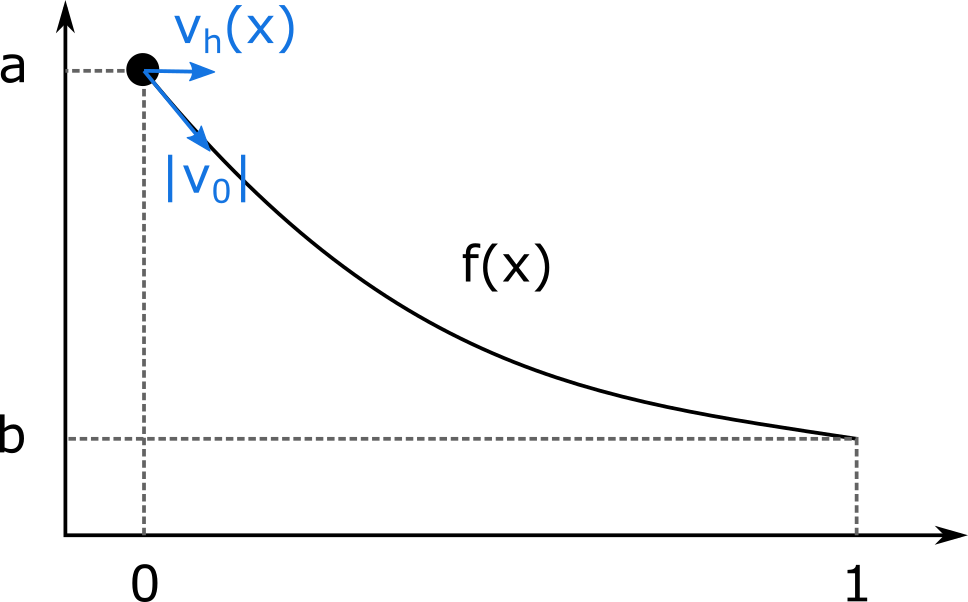
</div>

- consider a particle that 
    - starts at $\vec{r}(t=0) = [0,a]$ with $v(t=0) = v_0$
    - slides towards $\vec{r}(t=T) = [1,b]$
    - following the path given by $\vec{p}(x) = [x, f(x)]$ with $x \in [0,1]$
- assume $mg=1$:
- $\Rightarrow$ at position $[x,f(x)]$, its speed $v(x)$ satisfies: $\frac12 v(x)^2 = \frac12 v_0^2 + [a-f(x)]$ (initial kinetic + potential energy)
- $\Rightarrow v(x) = \sqrt{v_0^2 + 2[a-f(x)]}$
- direction of $\vec{v}$ will follow the path given by $\vec{p}(x) = [x, f(x)]$, i.e. $\vec{v} \propto \frac{\partial \vec{p}(x)}{\partial x} = [1, f'(x)]$
- $\Rightarrow$ normalized horizontal speed $v_h(x) = \frac{v(x)}{\sqrt{1+f'(x)^2}} = \frac{\sqrt{v_0^2 + 2[a-f(x)]}}{\sqrt{1+f'(x)^2}}.$

$$\Rightarrow T = \int_0^1 \frac{dx}{v_h(x)} = \int_0^1 \frac{\sqrt{1+f'(x)^2}}{\sqrt{v_0^2 + 2[a-f(x)]}}\,dx$$

Find $f(x)$ for a given $v_0$ so that $T$ is minimized.

### Algorithm

<div>
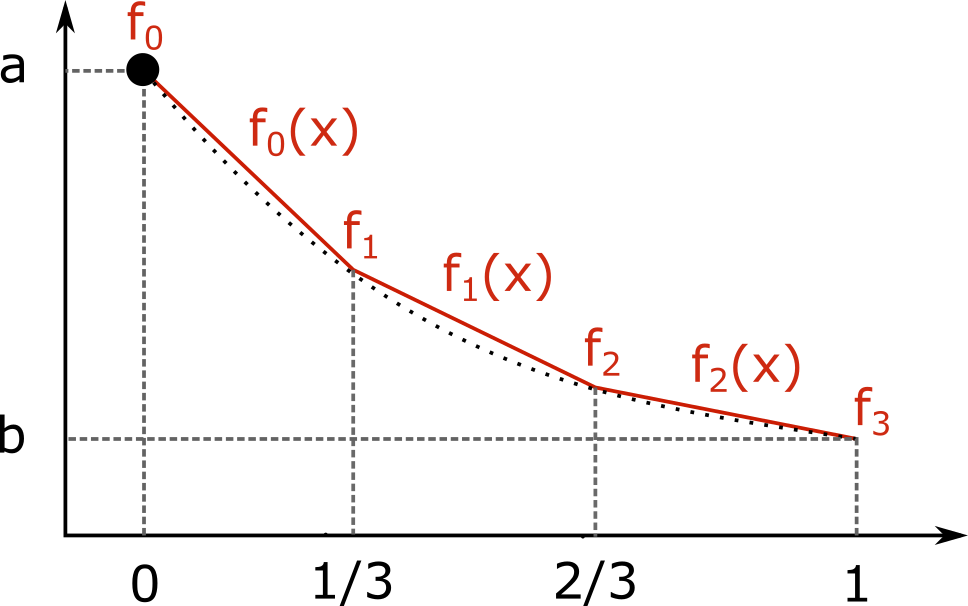
</div>

- divide interval $x \in [0,1]$ into $n$ subintervals: $x_i= i/n$, for $i=0,\ldots, n$
- assume that $f(x)$ is linear on each interval $[x_i, x_{i+1}]$, and continuous on the entire interval $[0,1]$
- $\Rightarrow$ $f(x)$ is determined by its value on the points $x_i$: $f_i = f(x_i)$
- $\Rightarrow$ optimize $T$ over all such functions
- Note 1: $f_0=a$ and $f_n=b$, since we start at $(0,a)$ and end up at $(1,b)$
- Note 2: $f$ has a constant derivative on the interval $[x_i, x_{i+1}]$: $f(x)|_{x=x_i} \approx f_i + f'_i \, (x - x_i)$
$$ \Rightarrow T = \sum_{i=0}^{n-1} \sqrt{1+{f_i'}^2} \int_{x_i}^{x_{i+1}} \frac{dx}{\sqrt{v_0^2 + 2a-2f_i-2f_i'(x-x_i)}}$$
- the integral can now be calculated exactly yielding the functional:
$$ \Rightarrow T[f']  = -\sum_{i=0}^{n-1} \frac{\sqrt{1+{f'_i}^2}}{f'_i}\, \left( \sqrt{v_0^2 + 2(a-f_{i+1})} - \sqrt{v_0^2 + 2(a-f_i)}\right)$$
- $\Rightarrow$ minimize this functional to get optimal $f'_i$
- $\Rightarrow$ from this we can easily re-construct $f_i = a + \sum_{j\le i}f'_j x_j$

Be careful: For $v_0=0$, the exact solution $f$ to the problem is given by a cycloid, which has an infinite derivative at $x=0$. This leads to large inaccuracies when trying to interpolate the integral.

In [ ]:
# settings
n  = 75
a  = 0.2  # starting height
b  = 0.0  # ending height (should be < a + 0.5*v^2, because g=1)
v0 = 0.1  # starting velocity, in the direction of the trajectory
dx = 1.0/(n-1)

# define total time T functional
def Tf(df, v0):
    
    v2 = v0**2
    T  = 0
    
    for i in range(0, len(df)):
        
        # Euler Step
        v2new = v2 - 2*df[i]*dx
        
        # in case we found a negative new velocity squared
        if(v2new < 0):
            return 10**10
        
        # T calculation
        if(df[i] >= 10**(-9)):
            
            T += np.sqrt( 1 + df[i]**2 ) / df[i] * ( np.sqrt(v2) - np.sqrt(v2new) )
            
        else: 
            
            # be careful with very small df[i]
            T += np.sqrt( 1 + df[i]** 2) / ( np.sqrt(v2) + np.sqrt(v2new) ) * 2.0 * dx
                
        # save new v^2 as old one
        v2 = v2new
        
    return T
    
# define equality constraint, so that only solutions
# are chosen which end up at (1, b)

def h1(df):
    return sum(df)*dx-(b-a)

cons = ({'type':'eq', 
         'fun': h1})

# optimize it
sol = optimize.minimize(Tf, x0=[b-a]*(n-1), method='SLSQP', constraints=cons, args=v0)

print( Tf(sol.x, v0) )

# plot it
plt.figure(1)
plt.grid()
x = np.linspace(0, 1, n)
plt.plot(x,a+dx*np.cumsum(np.insert(sol.x,0,0)))
plt.show()

In [ ]:
# plot it for varying initial velocities
plt.figure(1)
plt.grid()

for v0 in np.linspace(0, 3, 5):

    sol = optimize.minimize(Tf, x0=[b-a]*(n-1), method='SLSQP', constraints=cons, args=v0)

    plt.plot(x, a+dx*np.cumsum(np.insert(sol.x,0,0)), label=v0)
    
plt.legend()
plt.show()

In [ ]:
# removing the constraint
plt.figure(1)
plt.grid()

for v0 in np.linspace(0, 3, 5):

    sol = optimize.minimize(Tf, x0=[b-a]*(n-1), method='SLSQP', args=v0)

    plt.plot(x, a+dx*np.cumsum(np.insert(sol.x,0,0)), label=v0)
    
plt.legend()
plt.show()

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">I built a BRACHISTOCHRONE with <a href="https://twitter.com/tweetsauce?ref_src=twsrc%5Etfw">@tweetsauce</a>! Video: <a href="https://t.co/rC5oktUATG">https://t.co/rC5oktUATG</a> <a href="https://twitter.com/braincandylive?ref_src=twsrc%5Etfw">@braincandylive</a> <a href="https://t.co/sj1FVgqf5v">pic.twitter.com/sj1FVgqf5v</a></p>&mdash; Adam Savage (@donttrythis) <a href="https://twitter.com/donttrythis/status/823257178727321600?ref_src=twsrc%5Etfw">January 22, 2017</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

### With Friction
---
- friction: force opposite to the speed of the particle, with magnitude $\gamma \cdot v$
- differentiated energy equation (measures the change in kinetic energy) becomes

$$ 
\begin{align}
    \frac{d\left(\frac12v(x)^2\right)}{dx} &= -f'(x) -\gamma v(x)\sqrt{1+f'(x)^2} \\
    \Leftrightarrow v_{i+1}^2 &= v_i - 2 f'_i dx - 2 \gamma v_i \sqrt{1+f_i'^2} dx 
\end{align}
$$

In [ ]:
# settings
n  = 75
a  = 0.1  # starting height
b  = 0.0  # ending height (should be < a + 0.5*v^2, because g=1)
dx = 1.0/(n-1)

v0 = 0.9  # 0.9 # starting velocity, in the direction of the trajectory
g  = 0.5  # 1.5 # friction constant

def TfFriction(df, v0, g):
    v2 = v0**2
    T  = 0
    for i in range(0,len(df)):
        
        # Euler step
        v2new = v2 - 2*df[i]*dx - 2*g*np.sqrt(v2)*np.sqrt(1+df[i]**2)*dx
        
        # in case we found a negative new velocity squared
        if(v2new < 0):
            return 10**10
        
        # T calculation
        if(df[i] >= 10**(-9)):
            T += np.sqrt( 1 + df[i]**2 ) / df[i] * ( np.sqrt(v2) - np.sqrt(v2new) )
        else: # be careful with very small df[i]
            T += np.sqrt( 1 + df[i]** 2) / ( np.sqrt(v2) + np.sqrt(v2new) ) * 2.0 * dx
                
        # save new v^2 as old one
        v2 = v2new
        
    return T
    
# define equality constraint, so that only solutions
# are chosen which end up at (1, b)
def h1(df):
    return sum(df)*dx-(b-a)
cons=({'type':'eq', 'fun': h1})

# get optimized solution with and without friction
solFriction = optimize.minimize(TfFriction, x0=[b-a]*(n-1), method='SLSQP', constraints=cons, args=(v0, g))

# plot it
plt.figure(1)
x = np.linspace(0, 1, n)
plt.plot(x,a+dx*np.cumsum(np.insert(solFriction.x, 0, 0)), label='with friction')
plt.legend()
plt.show()
# ... linear parts are prefered

In [ ]:
plt.figure(1)

# vary gamma
for g in np.linspace(0, 1.5, 4):
    solFriction = optimize.minimize(TfFriction, x0=[b-a]*(n-1), method='SLSQP', constraints=cons, args=(v0, g))
    plt.plot(x, a+dx*np.cumsum(np.insert(solFriction.x, 0, 0)), label="$\gamma = %3.2f$"%g)
    
plt.legend()
plt.show()